In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-05-06.csv")
df = pd.read_csv("data/inc/data-inc-2024-05-13.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132786 entries, 0 to 132785
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        132786 non-null  int64  
 1   id_mls                    132786 non-null  object 
 2   bathrooms_total           132786 non-null  float64
 3   bedrooms_extra            132786 non-null  float64
 4   bedrooms                  132786 non-null  float64
 5   stories_total             132786 non-null  float64
 6   size_interior             132786 non-null  float64
 7   building_type             132786 non-null  object 
 8   agency_name               132786 non-null  object 
 9   agency_type               132786 non-null  object 
 10  property_type             132786 non-null  object 
 11  lng                       132786 non-null  float64
 12  lat                       132786 non-null  float64
 13  ownership_type            132786 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,5,4 + 0,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,Single Family,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.0
1,26879268,24010961,3,4 + 0,1.5,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.313424,Freehold,1,30X124,0,https://realtor.ca/real-estate/26879268/237-cu...,638509684643770000,N9B2B4,Ontario,339900.0
2,26879264,24010970,0,0,2.0,NaN,Duplex,MANOR WINDSOR REALTY LTD. - 455,Firm,Multi-family,...,42.308381,Freehold,1,30 X 143.25 FT,0,https://realtor.ca/real-estate/26879264/1339-b...,638509684623200000,N8X4M8,Ontario,529999.0
3,26878484,24010954,2,4 + 0,2.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.309865,Freehold,1,29.99X,0,https://realtor.ca/real-estate/26878484/365-jo...,638509649002400000,N9B2K9,Ontario,379900.0
4,26876902,24010820,1,2 + 0,NaN,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,Single Family,...,42.308149,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26876902/1323-l...,638509540770870000,N8X4L8,Ontario,199900.0


In [5]:
df.shape

(27426, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27426 entries, 0 to 27425
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27426 non-null  int64  
 1   id_mls                    27426 non-null  object 
 2   bathrooms_total           27426 non-null  int64  
 3   bedrooms                  27426 non-null  object 
 4   stories_total             17800 non-null  float64
 5   size_interior             14644 non-null  object 
 6   building_type             27426 non-null  object 
 7   agency_name               27426 non-null  object 
 8   agency_type               27426 non-null  object 
 9   property_type             27426 non-null  object 
 10  lng                       27426 non-null  float64
 11  lat                       27426 non-null  float64
 12  ownership_type            27426 non-null  object 
 13  ownership_type_group_ids  27426 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,5,4 + 0,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,Single Family,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.0
10,26876021,40585792,2,2 + 0,1.0,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,Single Family,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26876021/6156-t...,638509488153170000,N9J3Y7,Ontario,750000.0
24,26871502,24010777,4,4 + 1,2.0,2633.0000,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.238146,Freehold,1,74.24X129.33 X IRREG,0,https://realtor.ca/real-estate/26871502/2685-k...,638508748490700000,N9H2R7,Ontario,1249999.0
30,26869306,24010813,1,5 + 0,2.0,1683.0000,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.307456,Freehold,1,30X116.5,0,https://realtor.ca/real-estate/26869306/1504-g...,638508640681230000,N8X2R1,Ontario,399900.0
36,26868969,24010803,2,2 + 0,NaN,1050.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.244150,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26868969/1885-n...,638508604724370000,N9H1P9,Ontario,399900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27421,26858338,5795,2,3,NaN,1180 sqft,Manufactured Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.445309,none,none,4292,0,https://realtor.ca/real-estate/26858338/17-for...,638507021910600000,NaN,Northwest Territories,349900.0
27422,26858184,5794,2,2,NaN,1010 sqft,Apartment,COLDWELL BANKER NBS,Firm,Single Family,...,62.450794,Condominium/Strata,2,1010,0,https://realtor.ca/real-estate/26858184/5-5021...,638507008675400000,NaN,Northwest Territories,484900.0
27423,26857168,5793,3,3,NaN,1895 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.465561,none,none,3100,0,https://realtor.ca/real-estate/26857168/146a-m...,638506946806930000,NaN,Northwest Territories,629900.0
27424,26857167,5792,2,2,NaN,948 sqft,Apartment,COLDWELL BANKER NBS,Firm,Single Family,...,62.465976,Condominium/Strata,2,948,0,https://realtor.ca/real-estate/26857167/100-18...,638506946803770000,NaN,Northwest Territories,412000.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           4284
Ontario                    3765
Alberta                    3106
Quebec                     1573
Manitoba                    697
Saskatchewan                686
New Brunswick               360
Newfoundland & Labrador     133
Yukon                        27
Northwest Territories        13
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    12753
British Columbia            4561
Quebec                      3733
Alberta                     3285
Manitoba                     793
Saskatchewan                 791
Nova Scotia                  637
New Brunswick                485
Newfoundland & Labrador      187
Prince Edward Island         160
Yukon                         28
Northwest Territories         13
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,27426.0,27426.0,17800.0,27426.0,27426.0,27426.0,2.742600e+04,27426.0
mean,26866411.0,2.0,2.0,-90.0,47.0,2.0,6.385081e+17,886992.0
std,10101.0,6.0,3.0,20.0,3.0,5.0,1.418819e+12,1086151.0
min,26848511.0,0.0,0.0,-135.0,42.0,0.0,6.385052e+17,1.0
25%,26857719.0,1.0,1.0,-114.0,44.0,0.0,6.385070e+17,420000.0
50%,26866594.0,2.0,2.0,-80.0,45.0,1.0,6.385080e+17,664250.0
75%,26875106.0,3.0,2.0,-78.0,49.0,4.0,6.385091e+17,999900.0
max,26884006.0,921.0,131.0,-53.0,62.0,400.0,6.385118e+17,60000000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

27421

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

10


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
9931,26857897,S8313340,1,2,NaN,NaN,Apartment,ROYAL LEPAGE FIRST CONTACT REALTY,Firm,Single Family,...,44.391596,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26857897/104-20...,638506997806830000,L4M1H7,Ontario,599900.0
9933,26857897,S8313340,1,2,NaN,NaN,Apartment,ROYAL LEPAGE FIRST CONTACT REALTY,Firm,Single Family,...,44.391596,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26857897/104-20...,638506997806830000,L4M1H7,Ontario,599900.0
6669,26859665,W8314620,4,4 + 1,2.0,NaN,House,HOMELIFE/RESPONSE REALTY INC.,Firm,Single Family,...,43.524264,Freehold,1,36 x 85.3 FT,4,https://realtor.ca/real-estate/26859665/1040-e...,638507108587600000,L9T6T1,Ontario,1499000.0
6672,26859665,W8314620,4,4 + 1,2.0,NaN,House,HOMELIFE/RESPONSE REALTY INC.,Firm,Single Family,...,43.524264,Freehold,1,36 x 85.3 FT,4,https://realtor.ca/real-estate/26859665/1040-e...,638507108587600000,L9T6T1,Ontario,1499000.0
19993,26869145,R2880530,2,3,NaN,2002.0000,House,Homelife Benchmark Realty Corp.,Firm,Single Family,...,49.113601,Freehold,1,7385 sqft,6,https://realtor.ca/real-estate/26869145/18852-...,638508619435170000,V3S7V9,British Columbia,1379900.0
19996,26869145,R2880530,2,3,NaN,2002.0000,House,Homelife Benchmark Realty Corp.,Firm,Single Family,...,49.113601,Freehold,1,7385 sqft,6,https://realtor.ca/real-estate/26869145/18852-...,638508619435170000,V3S7V9,British Columbia,1379900.0
19994,26869146,R2880943,4,8,NaN,2184.0000,House,YPA Your Property Agent,Firm,Single Family,...,49.113549,Freehold,1,8344 sqft,4,https://realtor.ca/real-estate/26869146/6125-1...,638508619437130000,V3S5E9,British Columbia,1688000.0
19997,26869146,R2880943,4,8,NaN,2184.0000,House,YPA Your Property Agent,Firm,Single Family,...,49.113549,Freehold,1,8344 sqft,4,https://realtor.ca/real-estate/26869146/6125-1...,638508619437130000,V3S5E9,British Columbia,1688000.0
25970,26880327,E4386798,1,1,NaN,59.31 m2,Apartment,Initia Real Estate,Firm,Single Family,...,53.566331,Condominium/Strata,2,68.89 m2,0,https://realtor.ca/real-estate/26880327/105-11...,638509780247170000,T5M0K5,Alberta,63000.0
25971,26880327,E4386798,1,1,NaN,59.31 m2,Apartment,Initia Real Estate,Firm,Single Family,...,53.566331,Condominium/Strata,2,68.89 m2,0,https://realtor.ca/real-estate/26880327/105-11...,638509780247170000,T5M0K5,Alberta,63000.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
9933,26857897,S8313340,1,2,NaN,NaN,Apartment,ROYAL LEPAGE FIRST CONTACT REALTY,Firm,Single Family,...,44.391596,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26857897/104-20...,638506997806830000,L4M1H7,Ontario,599900.0
6672,26859665,W8314620,4,4 + 1,2.0,NaN,House,HOMELIFE/RESPONSE REALTY INC.,Firm,Single Family,...,43.524264,Freehold,1,36 x 85.3 FT,4,https://realtor.ca/real-estate/26859665/1040-e...,638507108587600000,L9T6T1,Ontario,1499000.0
19996,26869145,R2880530,2,3,NaN,2002.0000,House,Homelife Benchmark Realty Corp.,Firm,Single Family,...,49.113601,Freehold,1,7385 sqft,6,https://realtor.ca/real-estate/26869145/18852-...,638508619435170000,V3S7V9,British Columbia,1379900.0
19997,26869146,R2880943,4,8,NaN,2184.0000,House,YPA Your Property Agent,Firm,Single Family,...,49.113549,Freehold,1,8344 sqft,4,https://realtor.ca/real-estate/26869146/6125-1...,638508619437130000,V3S5E9,British Columbia,1688000.0
25971,26880327,E4386798,1,1,NaN,59.31 m2,Apartment,Initia Real Estate,Firm,Single Family,...,53.566331,Condominium/Strata,2,68.89 m2,0,https://realtor.ca/real-estate/26880327/105-11...,638509780247170000,T5M0K5,Alberta,63000.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(27416, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27416 entries, 0 to 27425
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27416 non-null  int64  
 1   id_mls                    27416 non-null  object 
 2   bathrooms_total           27416 non-null  int64  
 3   bedrooms                  27416 non-null  object 
 4   stories_total             17798 non-null  float64
 5   size_interior             14638 non-null  object 
 6   building_type             27416 non-null  object 
 7   agency_name               27416 non-null  object 
 8   agency_type               27416 non-null  object 
 9   property_type             27416 non-null  object 
 10  lng                       27416 non-null  float64
 11  lat                       27416 non-null  float64
 12  ownership_type            27416 non-null  object 
 13  ownership_type_group_ids  27416 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  15563
Condominium/Strata         4503
none                       4255
Strata                     2033
Condominium                 607
Leasehold                   188
Freehold Condo              102
Undivided Co-ownership       51
Leasehold Condo/Strata       41
Shares in Co-operative       16
Unknown                      15
Other, See Remarks           12
Timeshare/Fractional         12
Leasehold/Leased Land        11
Life Lease                    6
Cooperative                   1
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                       15265
Apartment                    5102
Row / Townhouse              2822
none                         2144
Duplex                        733
Mobile Home                   219
Triplex                       204
Multi-Family                  186
No Building                   164
Fourplex                      107
Unknown                       106
Other                         106
Recreational                   76
Manufactured Home              74
Manufactured Home/Mobile       69
Modular                        22
Parking                         7
Two Apartment House             5
Commercial Mix                  5
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold              63
none                  28
Strata                 9
Condominium/Strata     5
Freehold Condo         1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    24750
Vacant Land       1973
Multi-family       481
Agriculture        121
Recreational        83
Parking              8
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24750 entries, 0 to 27425
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24750 non-null  int64  
 1   id_mls                    24750 non-null  object 
 2   bathrooms_total           24750 non-null  int64  
 3   bedrooms                  24750 non-null  object 
 4   stories_total             17379 non-null  float64
 5   size_interior             14279 non-null  object 
 6   building_type             24750 non-null  object 
 7   agency_name               24750 non-null  object 
 8   agency_type               24750 non-null  object 
 9   property_type             24750 non-null  object 
 10  lng                       24750 non-null  float64
 11  lat                       24750 non-null  float64
 12  ownership_type            24750 non-null  object 
 13  ownership_type_group_ids  24750 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    11801
British Columbia            4250
Quebec                      3254
Alberta                     3063
Manitoba                     691
Saskatchewan                 675
Nova Scotia                  438
New Brunswick                336
Newfoundland & Labrador      118
Prince Edward Island          83
Yukon                         28
Northwest Territories         13
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       15252
Apartment                    5086
Row / Townhouse              2822
Duplex                        605
none                          314
Mobile Home                   219
Triplex                       157
Fourplex                       83
Manufactured Home              70
Manufactured Home/Mobile       69
Recreational                   29
Modular                        22
Other                          16
Two Apartment House             5
Multi-Family                    1
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  14142
Condominium/Strata         4476
none                       3084
Strata                     2006
Condominium                 605
Leasehold                   180
Freehold Condo              102
Undivided Co-ownership       51
Leasehold Condo/Strata       40
Shares in Co-operative       14
Unknown                      12
Leasehold/Leased Land        11
Other, See Remarks           10
Timeshare/Fractional         10
Life Lease                    6
Cooperative                   1
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
103,26852493,24010507,1,2 + 0,1.0,NaN,House,CENTURY 21 REQUEST REALTY INC - 606,Firm,Single Family,...,42.231650,none,none,24X36,0,https://realtor.ca/real-estate/26852493/1505-m...,638506192850830000,N9J2G7,Ontario,19000.0
138,26879270,24010952,1,2 + 0,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.147315,none,none,35.86XIrreg,0,https://realtor.ca/real-estate/26879270/3-lila...,638509684651900000,N0R1J0,Ontario,198300.0
191,26872573,X8323628,3,2 + 3,1.5,NaN,Duplex,RE/MAX REALTY SERVICES INC.,Firm,Single Family,...,42.318923,none,none,60.23 x 150.57 FT,0,https://realtor.ca/real-estate/26872573/1315-g...,638508806188770000,N8Y2X8,Ontario,439000.0
298,26859739,X8314864,2,3 + 1,1.0,NaN,Duplex,INITIA REAL ESTATE (ONTARIO) LTD,Firm,Single Family,...,42.982419,none,none,44 x 132 FT,4,https://realtor.ca/real-estate/26859739/749-al...,638507110143030000,N7T5G7,Ontario,399900.0
313,26857555,24010615,1,1 + 0,NaN,184.0000,none,RE/MAX Sarnia Realty Inc,Firm,Single Family,...,42.984161,none,none,0X0,0,https://realtor.ca/real-estate/26857555/1319-e...,638506987117500000,N7S3Y1,Ontario,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27417,26875241,5799,2,3,NaN,1134 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.449271,none,none,5382,0,https://realtor.ca/real-estate/26875241/5611-5...,638509168054730000,X1A1G2,Northwest Territories,499900.0
27420,26859984,5796,2,3,NaN,1372 sqft,Mobile Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.445044,none,none,7384,0,https://realtor.ca/real-estate/26859984/3-tayl...,638507139411100000,NaN,Northwest Territories,474900.0
27421,26858338,5795,2,3,NaN,1180 sqft,Manufactured Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.445309,none,none,4292,0,https://realtor.ca/real-estate/26858338/17-for...,638507021910600000,NaN,Northwest Territories,349900.0
27423,26857168,5793,3,3,NaN,1895 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.465561,none,none,3100,0,https://realtor.ca/real-estate/26857168/146a-m...,638506946806930000,NaN,Northwest Territories,629900.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

103      https://realtor.ca/real-estate/26852493/1505-m...
138      https://realtor.ca/real-estate/26879270/3-lila...
191      https://realtor.ca/real-estate/26872573/1315-g...
298      https://realtor.ca/real-estate/26859739/749-al...
313      https://realtor.ca/real-estate/26857555/1319-e...
                               ...                        
27417    https://realtor.ca/real-estate/26875241/5611-5...
27420    https://realtor.ca/real-estate/26859984/3-tayl...
27421    https://realtor.ca/real-estate/26858338/17-for...
27423    https://realtor.ca/real-estate/26857168/146a-m...
27425    https://realtor.ca/real-estate/26852329/4914-5...
Name: page_url, Length: 3084, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

487      https://realtor.ca/real-estate/26879110/6-stew...
1015     https://realtor.ca/real-estate/26860971/340-fr...
1051     https://realtor.ca/real-estate/26851281/340-fr...
1222     https://realtor.ca/real-estate/26850879/6-bent...
1278     https://realtor.ca/real-estate/26862384/9534-l...
1293     https://realtor.ca/real-estate/26883832/131-su...
1564     https://realtor.ca/real-estate/26848784/77307-...
1629     https://realtor.ca/real-estate/26882280/43-wat...
1764     https://realtor.ca/real-estate/26878310/580-be...
1766     https://realtor.ca/real-estate/26878292/580-be...
4104     https://realtor.ca/real-estate/26875538/4449-m...
8966     https://realtor.ca/real-estate/26864879/208-sp...
9420     https://realtor.ca/real-estate/26873531/12-mai...
9585     https://realtor.ca/real-estate/26869191/45-the...
9806     https://realtor.ca/real-estate/26862391/5216-c...
9824     https://realtor.ca/real-estate/26861916/112-li...
10200    https://realtor.ca/real-estate/26849680/35-pen.

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,
Alberta,584,228,3,1727,9,48,33,0,0,0,4,423,2,0,2
British Columbia,1330,138,8,2033,58,21,14,0,0,0,4,632,3,0,9
Manitoba,70,14,0,571,0,0,17,0,0,2,0,17,0,0,0
New Brunswick,4,0,0,307,0,0,6,0,0,0,0,9,0,0,10
Newfoundland & Labrador,0,0,0,110,0,0,2,0,1,0,0,0,0,5,0
Northwest Territories,4,0,0,5,2,0,2,0,0,0,0,0,0,0,0
Nova Scotia,24,6,0,358,0,0,11,0,0,0,19,15,0,0,5
Ontario,2184,50,11,7594,0,0,68,18,0,14,1,1607,22,0,232
Prince Edward Island,3,1,0,65,0,0,7,0,0,0,0,7,0,0,0


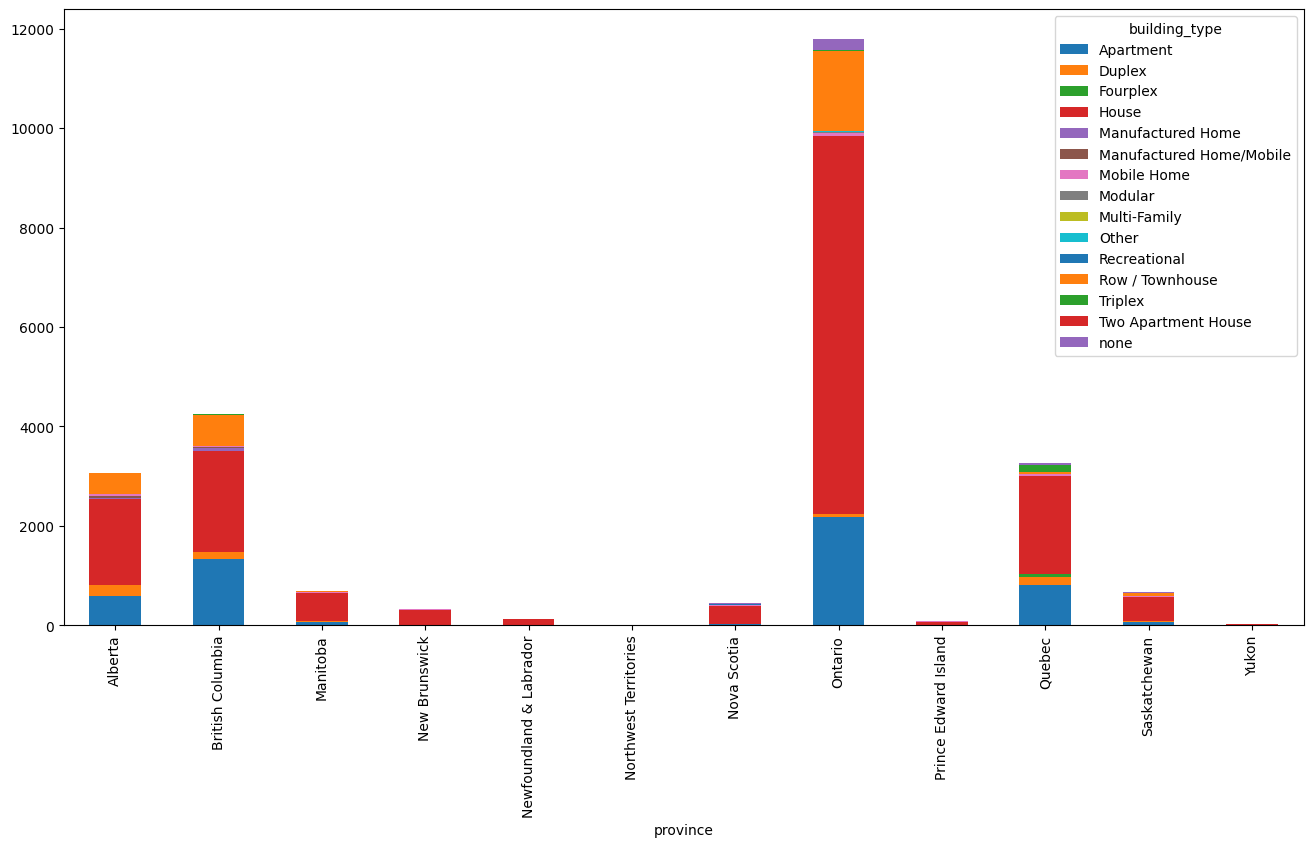

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

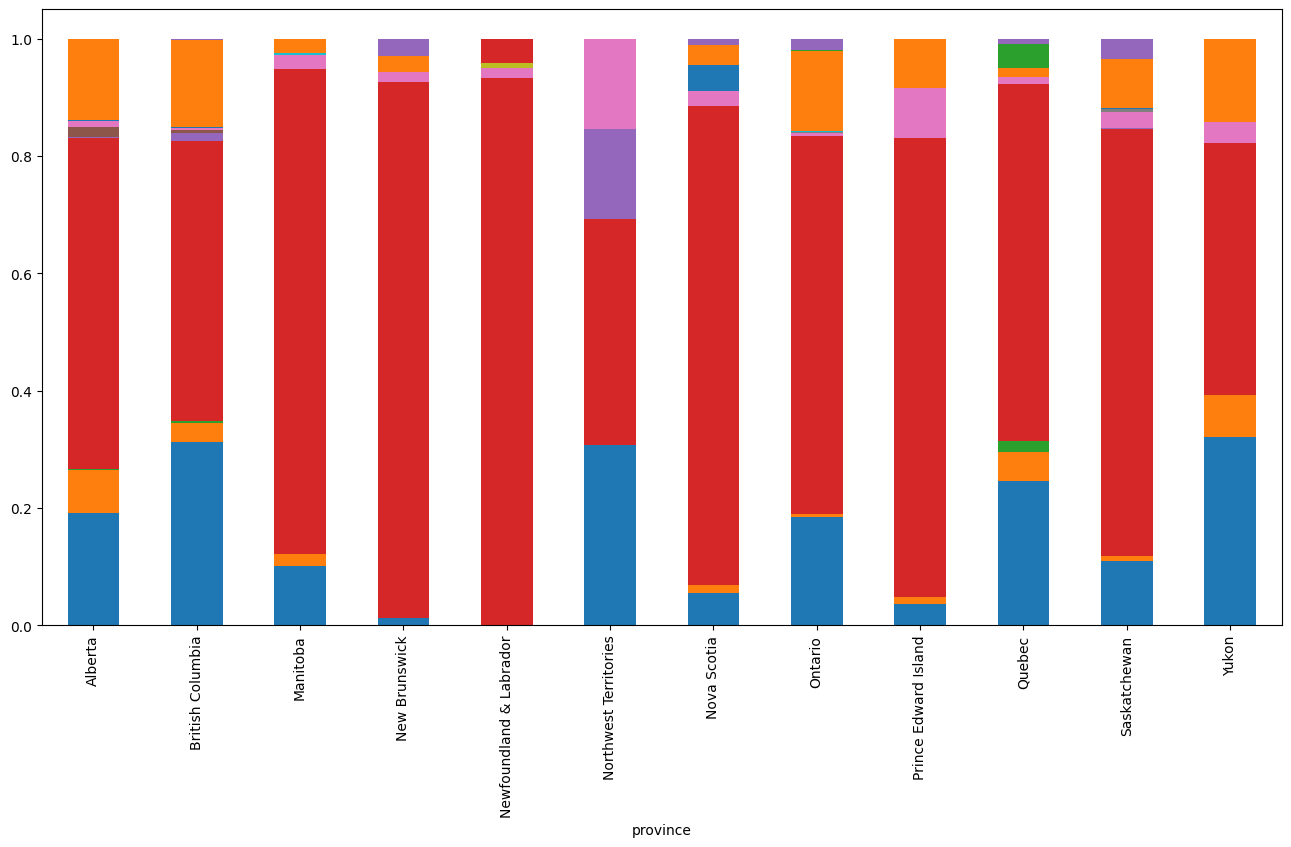

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,999,0,1914,0,15,0,0,0,0,0,0,0,0,0,135
British Columbia,0,61,0,2012,0,45,39,11,0,5,5,2006,3,0,8,55
Manitoba,0,0,0,573,102,15,0,0,0,0,0,0,0,0,1,0
New Brunswick,0,19,0,217,0,6,0,0,0,0,0,0,0,0,0,94
Newfoundland & Labrador,0,0,0,117,0,0,0,0,0,0,0,0,0,0,0,1
Northwest Territories,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,8
Nova Scotia,0,36,0,394,0,7,0,0,0,0,0,0,0,0,1,0
Ontario,605,2371,1,8328,0,71,1,0,6,5,9,0,4,4,0,396
Prince Edward Island,0,6,0,69,0,3,0,0,0,0,0,0,3,0,2,0


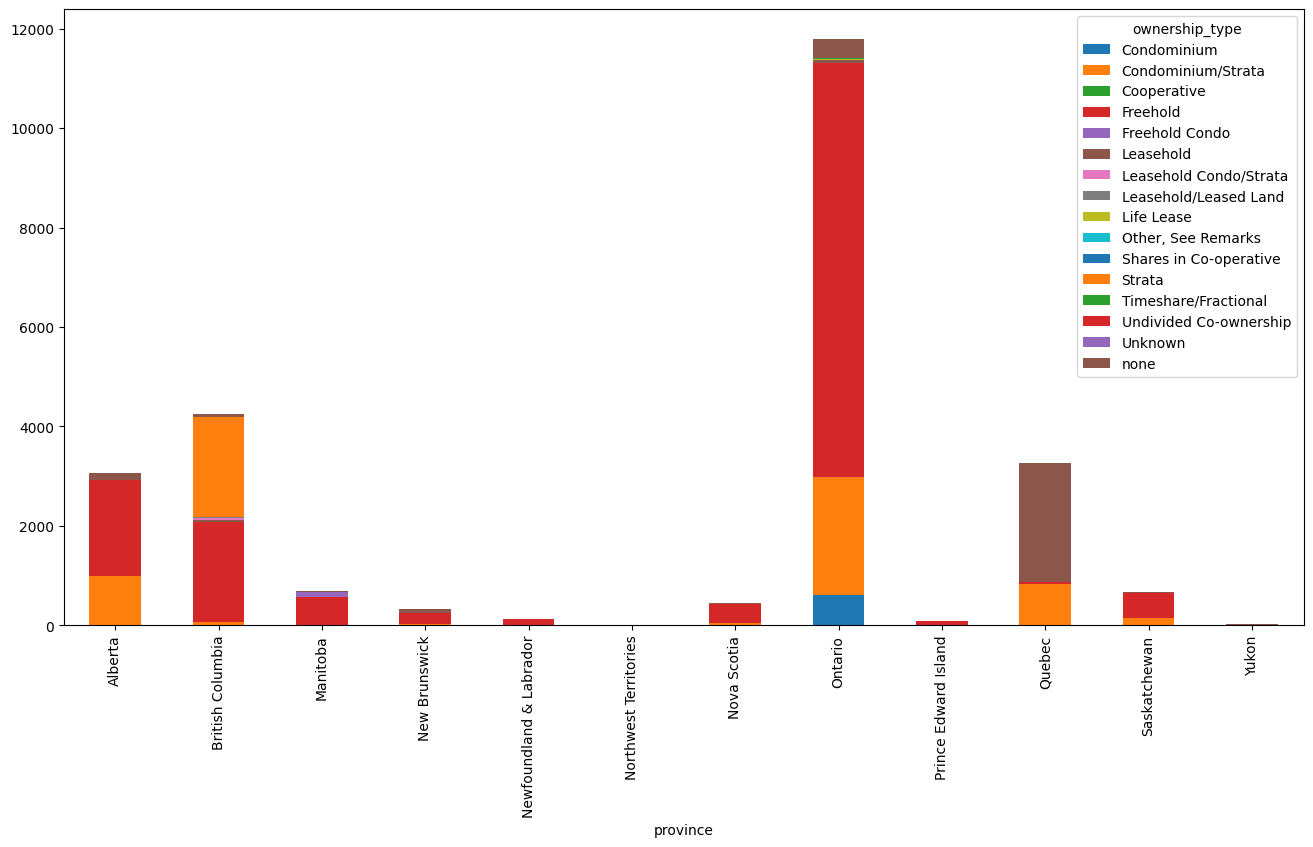

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

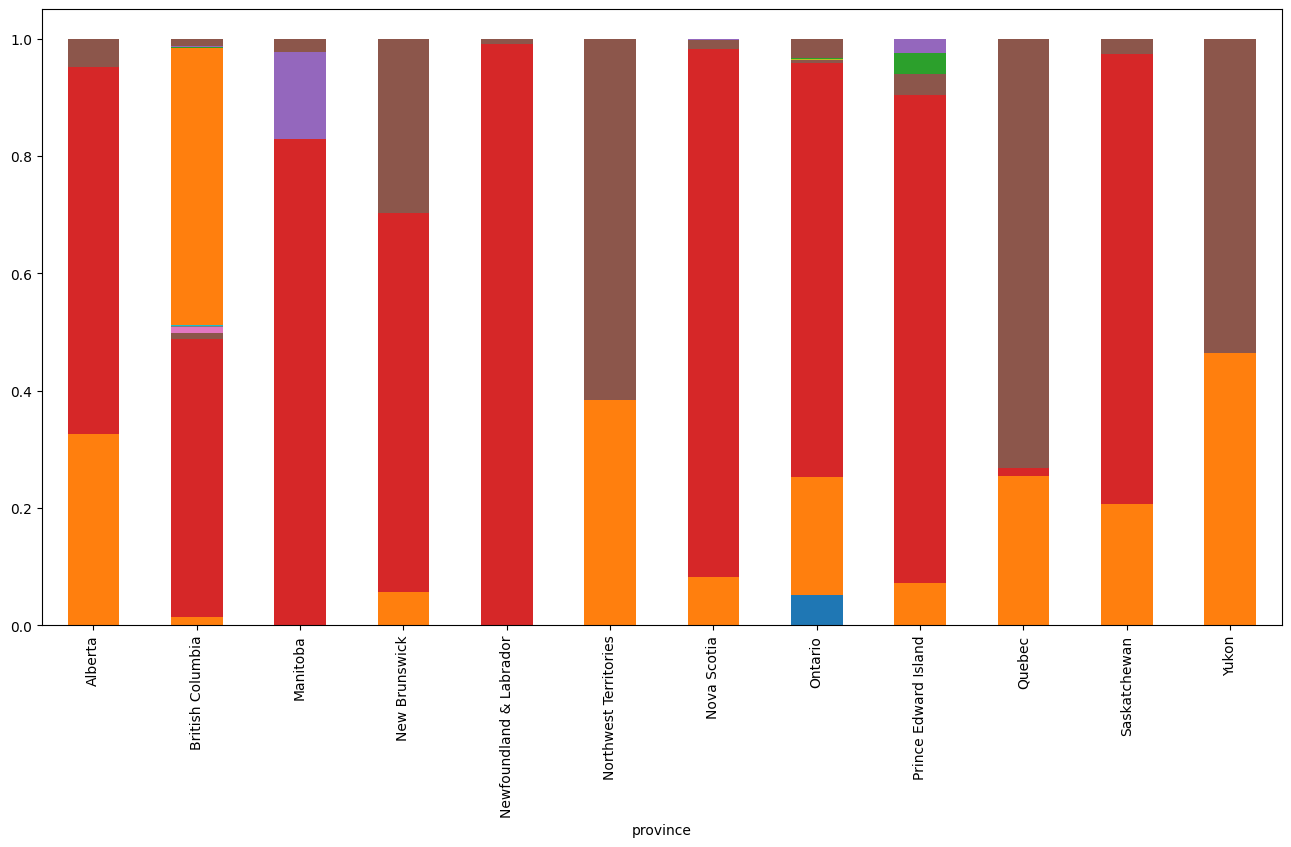

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        3298
Strata                    1225
Condominium                346
Freehold Condo              70
Undivided Co-ownership      50
Leasehold Condo/Strata      33
Freehold                    26
none                        16
Shares in Co-operative      11
Timeshare/Fractional         3
Life Lease                   2
Leasehold/Leased Land        2
Cooperative                  1
Leasehold                    1
Unknown                      1
Other, See Remarks           1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold              282
none                  206
Strata                 80
Condominium/Strata     34
Leasehold               2
Other, See Remarks      1
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,
Condominium,346,0,0,16,0,0,0,0,0,0,0,241,0,0,2
Condominium/Strata,3298,34,0,77,0,8,1,0,0,5,0,1008,0,0,45
Cooperative,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Freehold,26,282,6,12662,13,53,54,6,1,3,23,953,5,5,50
Freehold Condo,70,0,0,17,0,0,0,0,0,1,0,14,0,0,0
Leasehold,1,2,0,60,15,7,65,16,0,0,1,5,0,0,8
Leasehold Condo/Strata,33,0,0,0,1,0,0,0,0,0,0,5,0,0,1
Leasehold/Leased Land,2,0,0,8,1,0,0,0,0,0,0,0,0,0,0
Life Lease,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0


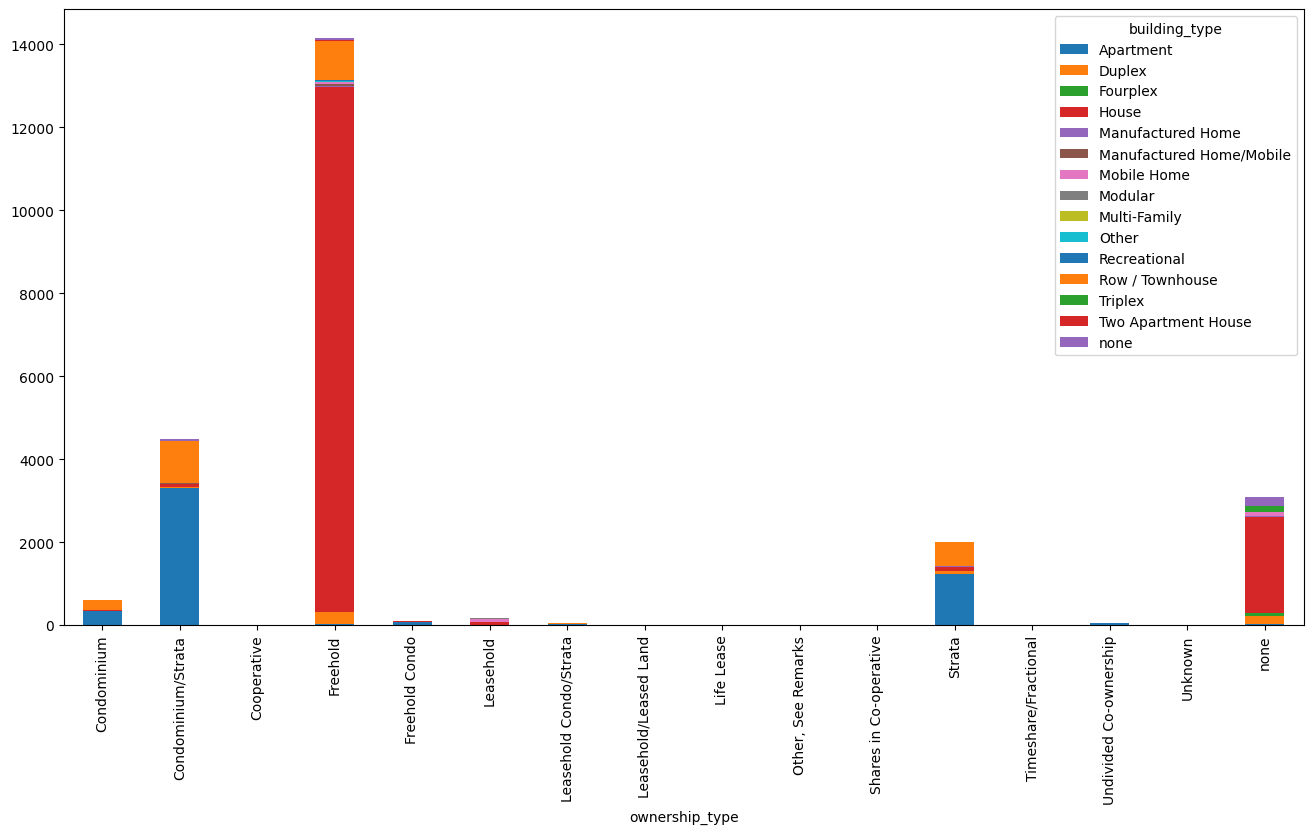

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

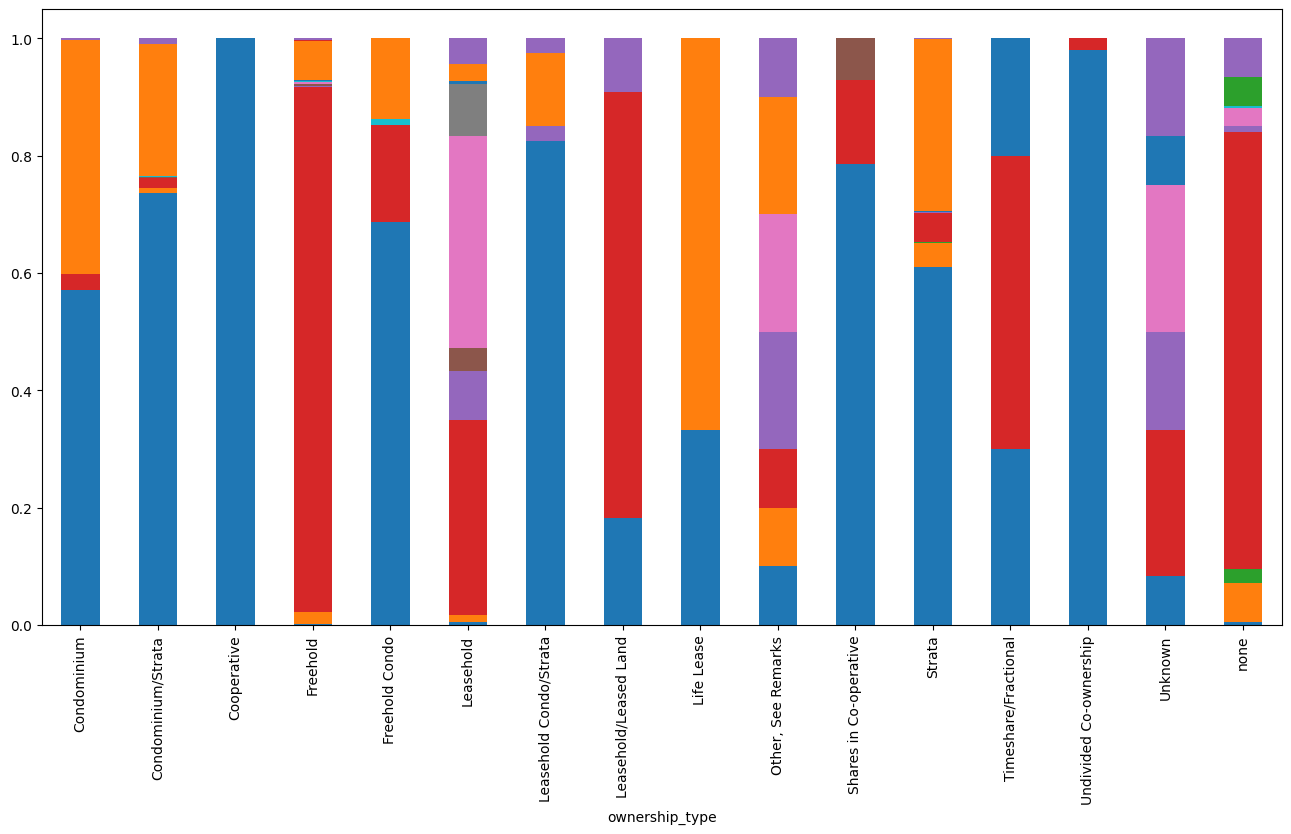

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,605.0,605.0,372.0,605.0,605.0,605.0,6.050000e+02,605.0
mean,26867263.0,3.0,2.0,-101.0,49.0,3.0,6.385082e+17,767789.0
std,10315.0,1.0,0.0,21.0,3.0,15.0,1.484220e+12,550415.0
min,26848607.0,0.0,1.0,-135.0,42.0,0.0,6.385052e+17,1500.0
25%,26858792.0,2.0,2.0,-114.0,46.0,0.0,6.385071e+17,424900.0
50%,26868114.0,3.0,2.0,-114.0,49.0,2.0,6.385082e+17,595000.0
75%,26875549.0,3.0,2.0,-74.0,51.0,3.0,6.385094e+17,898000.0
max,26883849.0,6.0,4.0,-63.0,61.0,355.0,6.385117e+17,3380000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,157.0,157.0,85.0,157.0,157.0,157.0,1.570000e+02,157.0
mean,26866915.0,2.0,2.0,-76.0,46.0,3.0,6.385082e+17,883513.0
std,9984.0,1.0,0.0,8.0,1.0,3.0,1.437404e+12,570399.0
min,26848598.0,1.0,1.0,-123.0,43.0,0.0,6.385052e+17,139900.0
25%,26858128.0,1.0,2.0,-74.0,45.0,0.0,6.385070e+17,545000.0
50%,26866916.0,1.0,2.0,-74.0,46.0,3.0,6.385081e+17,799000.0
75%,26876250.0,1.0,2.0,-73.0,46.0,4.0,6.385095e+17,995000.0
max,26883801.0,12.0,3.0,-65.0,54.0,14.0,6.385116e+17,3299000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,83.0,83.0,41.0,83.0,83.0,83.0,8.300000e+01,83.0
mean,26866529.0,2.0,2.0,-80.0,46.0,3.0,6.385081e+17,935687.0
std,10412.0,2.0,0.0,15.0,2.0,3.0,1.498864e+12,780437.0
min,26848836.0,1.0,1.0,-120.0,43.0,0.0,6.385053e+17,99000.0
25%,26858570.0,1.0,2.0,-79.0,45.0,0.0,6.385071e+17,599000.0
50%,26866895.0,1.0,2.0,-74.0,46.0,4.0,6.385080e+17,715000.0
75%,26874872.0,2.0,2.0,-73.0,47.0,6.0,6.385091e+17,999000.0
max,26883936.0,12.0,3.0,-69.0,54.0,10.0,6.385117e+17,4950000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2822.0,2822.0,2046.0,2822.0,2822.0,2822.0,2.822000e+03,2822.0
mean,26867016.0,3.0,2.0,-95.0,47.0,2.0,6.385082e+17,762686.0
std,9898.0,1.0,2.0,20.0,4.0,1.0,1.386345e+12,458100.0
min,26848527.0,0.0,1.0,-135.0,42.0,0.0,6.385052e+17,1.0
25%,26858587.0,2.0,2.0,-114.0,44.0,0.0,6.385071e+17,524925.0
50%,26867234.0,3.0,2.0,-80.0,45.0,2.0,6.385081e+17,699900.0
75%,26875724.0,3.0,3.0,-79.0,49.0,2.0,6.385094e+17,900000.0
max,26884003.0,7.0,65.0,-63.0,61.0,28.0,6.385118e+17,14250000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       15252
Apartment                    5086
Row / Townhouse              2822
Semi-Detached                 845
none                          314
Mobile Home                   219
Manufactured Home              70
Manufactured Home/Mobile       69
Recreational                   29
Modular                        22
Other                          16
Two Apartment House             5
Multi-Family                    1
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              15252
Apartment           5086
Row / Townhouse     2822
Semi-Detached        845
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24005 entries, 0 to 27425
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24005 non-null  int64  
 1   id_mls                    24005 non-null  object 
 2   bathrooms_total           24005 non-null  int64  
 3   bedrooms                  24005 non-null  object 
 4   stories_total             16898 non-null  float64
 5   size_interior             13761 non-null  object 
 6   building_type             24005 non-null  object 
 7   agency_name               24005 non-null  object 
 8   agency_type               24005 non-null  object 
 9   property_type             24005 non-null  object 
 10  lng                       24005 non-null  float64
 11  lat                       24005 non-null  float64
 12  ownership_type            24005 non-null  object 
 13  ownership_type_group_ids  24005 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    11468
British Columbia            4144
Quebec                      3182
Alberta                     2967
Manitoba                     672
Saskatchewan                 627
Nova Scotia                  403
New Brunswick                320
Newfoundland & Labrador      110
Prince Edward Island          76
Yukon                         27
Northwest Territories          9
Name: count, dtype: int64

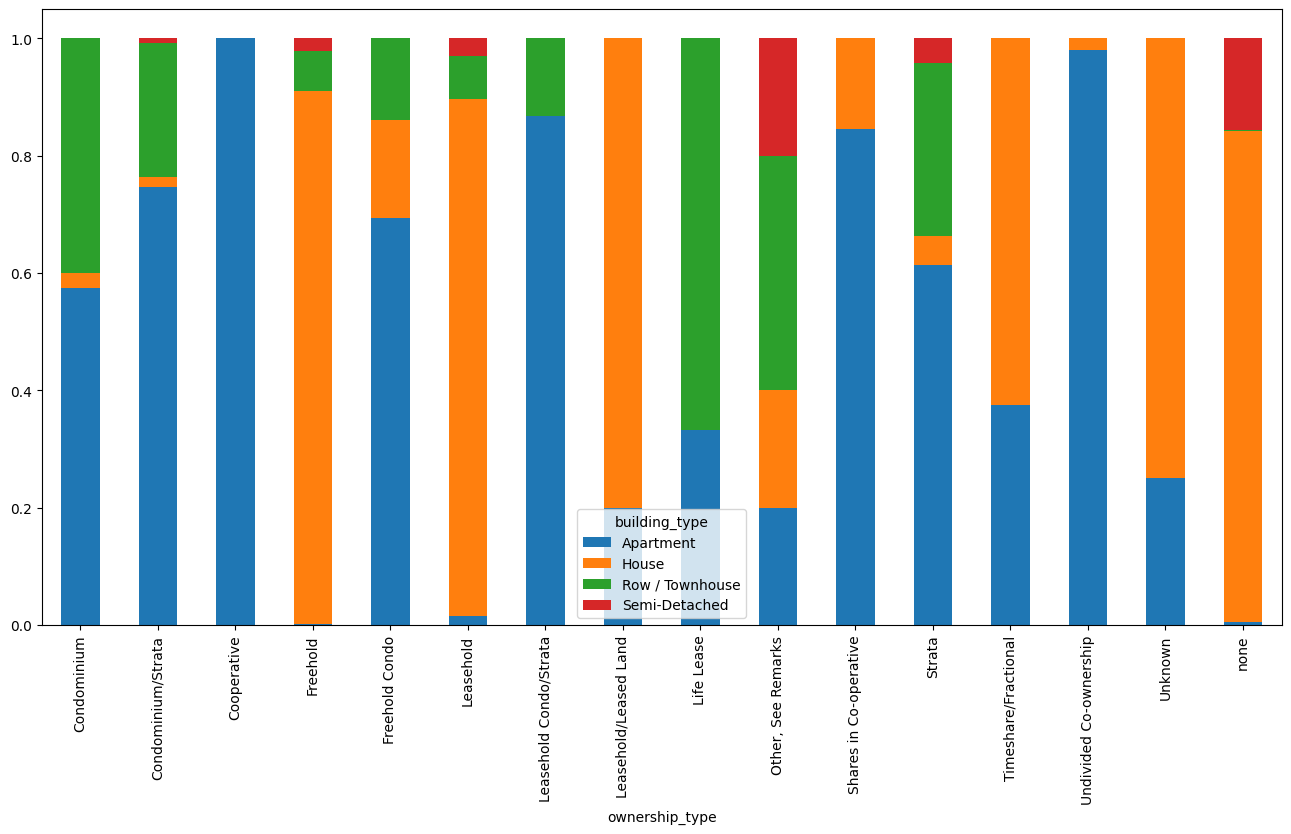

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          13934
2           7170
none        2754
4             78
1 2           51
3              8
2 3            6
1 2 3 4        4
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12662
none        2300
2            213
4             68
3              5
1 2 3 4        3
1 2            1
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          4983
1 2          50
1            26
none         18
3             3
4             3
2 3           2
1 2 3 4       1
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    432
1       293
2       118
4         2
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1856
1        953
4          5
2 3        4
none       4
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,13934.0,13934.0,11259.0,13934.0,13934.0,13934.0,1.393400e+04,13934.0
mean,26866605.0,3.0,2.0,-91.0,46.0,3.0,6.385081e+17,1083115.0
std,9948.0,1.0,1.0,18.0,4.0,5.0,1.385388e+12,1147315.0
min,26848513.0,0.0,1.0,-132.0,42.0,0.0,6.385052e+17,1.0
25%,26858154.0,2.0,1.0,-113.0,44.0,0.0,6.385070e+17,559000.0
50%,26866924.0,3.0,2.0,-80.0,45.0,3.0,6.385081e+17,818944.0
75%,26875296.0,4.0,2.0,-79.0,50.0,5.0,6.385094e+17,1279000.0
max,26884003.0,15.0,6.0,-53.0,59.0,400.0,6.385118e+17,60000000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2754.0,2754.0,2420.0,2754.0,2754.0,2754.0,2.754000e+03,2754.0
mean,26867010.0,2.0,2.0,-76.0,46.0,4.0,6.385082e+17,674533.0
std,10367.0,1.0,1.0,11.0,2.0,4.0,1.513782e+12,571165.0
min,26848525.0,0.0,1.0,-135.0,42.0,0.0,6.385052e+17,19000.0
25%,26858374.0,1.0,1.0,-74.0,45.0,2.0,6.385070e+17,374900.0
50%,26867580.0,2.0,2.0,-74.0,46.0,4.0,6.385081e+17,549999.0
75%,26875128.0,2.0,2.0,-73.0,46.0,6.0,6.385092e+17,799000.0
max,26883947.0,8.0,3.0,-57.0,62.0,52.0,6.385117e+17,10000000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,8.0,8.0,5.0,8.0,8.0,8.0,8.000000e+00,8.0
mean,26870064.0,2.0,1.0,-78.0,46.0,1.0,6.385087e+17,302162.0
std,10545.0,1.0,1.0,20.0,1.0,1.0,1.406307e+12,392284.0
min,26849879.0,1.0,1.0,-124.0,45.0,0.0,6.385060e+17,22000.0
25%,26865134.0,2.0,1.0,-79.0,45.0,0.0,6.385079e+17,54000.0
50%,26872316.0,2.0,1.0,-78.0,46.0,0.0,6.385090e+17,64200.0
75%,26876843.0,3.0,2.0,-63.0,46.0,1.0,6.385095e+17,457175.0
max,26882001.0,3.0,2.0,-63.0,49.0,2.0,6.385104e+17,1050000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,78.0,78.0,56.0,78.0,78.0,78.0,7.800000e+01,78.0
mean,26866441.0,2.0,1.0,-100.0,48.0,1.0,6.385081e+17,609061.0
std,10256.0,1.0,1.0,19.0,3.0,2.0,1.405063e+12,476347.0
min,26848548.0,1.0,1.0,-125.0,42.0,0.0,6.385052e+17,99900.0
25%,26857742.0,1.0,1.0,-122.0,45.0,0.0,6.385070e+17,249925.0
50%,26866390.0,2.0,1.0,-101.0,49.0,0.0,6.385080e+17,469900.0
75%,26875920.0,2.0,2.0,-81.0,50.0,0.0,6.385095e+17,785722.0
max,26883506.0,4.0,6.0,-63.0,56.0,8.0,6.385114e+17,2395000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,4.0,4.0,3.0,4.0,4.0,4.0,4.000000e+00,4.0
mean,26862186.0,2.0,3.0,-106.0,48.0,0.0,6.385075e+17,486950.0
std,8397.0,0.0,3.0,28.0,2.0,1.0,1.108834e+12,145048.0
min,26854377.0,1.0,1.0,-122.0,45.0,0.0,6.385063e+17,329000.0
25%,26855556.0,2.0,2.0,-122.0,48.0,0.0,6.385067e+17,381500.0
50%,26861304.0,2.0,2.0,-120.0,49.0,0.0,6.385074e+17,499450.0
75%,26867935.0,2.0,4.0,-104.0,49.0,0.0,6.385082e+17,604900.0
max,26871759.0,2.0,6.0,-64.0,50.0,2.0,6.385088e+17,619900.0


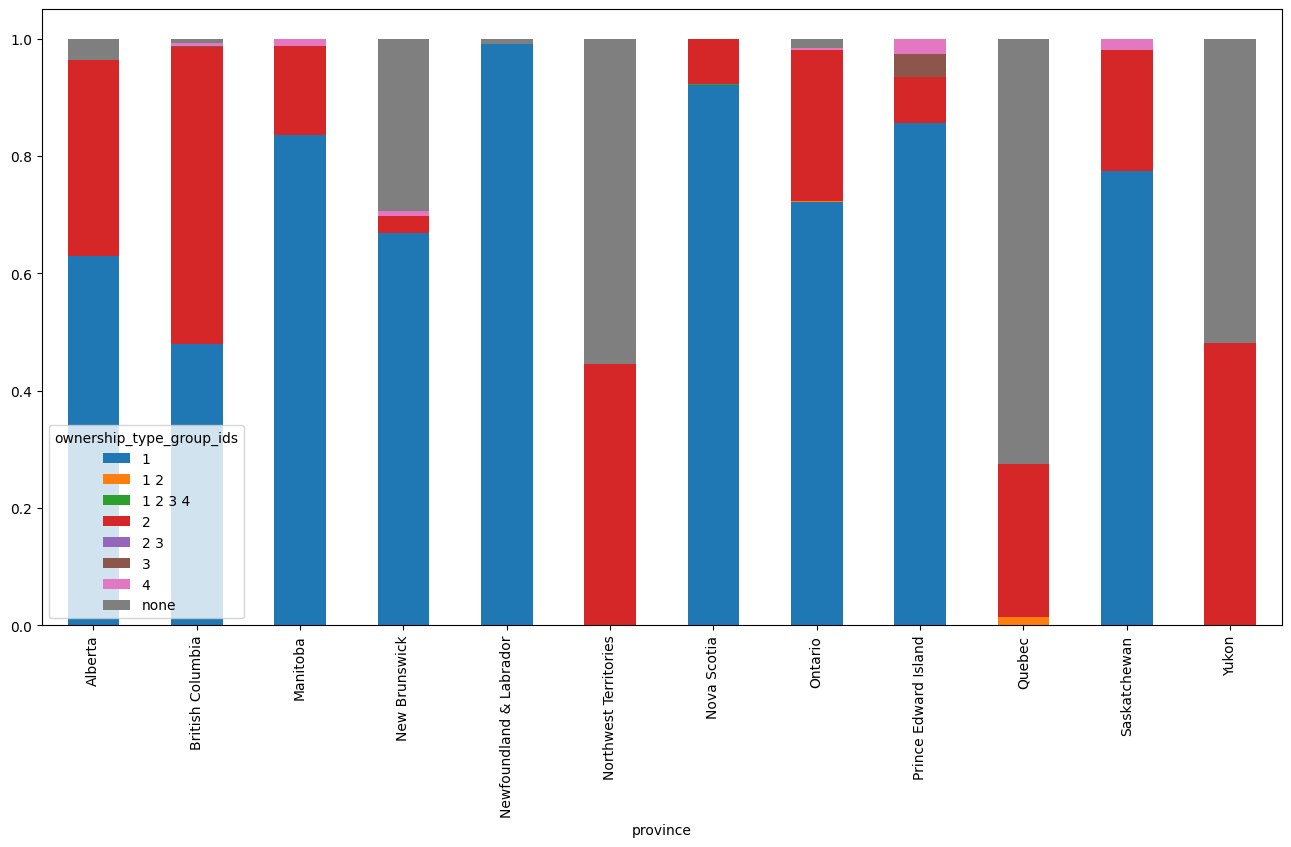

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          13934
2           7170
none        2754
4             78
1 2           51
3              8
2 3            6
1 2 3 4        4
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_6753/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    13934
2     7170
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bathrooms_total           21104 non-null  int64  
 3   bedrooms                  21104 non-null  object 
 4   stories_total             14366 non-null  float64
 5   size_interior             12659 non-null  object 
 6   building_type             21104 non-null  object 
 7   agency_name               21104 non-null  object 
 8   agency_type               21104 non-null  object 
 9   property_type             21104 non-null  object 
 10  lng                       21104 non-null  float64
 11  lat                       21104 non-null  float64
 12  ownership_type            21104 non-null  object 
 13  ownership_type_group_ids  21104 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    11236
British Columbia            4084
Alberta                     2857
Quebec                       827
Manitoba                     663
Saskatchewan                 615
Nova Scotia                  402
New Brunswick                223
Newfoundland & Labrador      109
Prince Edward Island          71
Yukon                         13
Northwest Territories          4
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6753/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    11600
True      9504
Name: count, dtype: int64

In [73]:
df.shape

(21104, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6753/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,5,4 + 0,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,Single Family,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.0
1,26879268,24010961,3,4 + 0,1.5,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.313424,Freehold,1,30X124,0,https://realtor.ca/real-estate/26879268/237-cu...,638509684643770000,N9B2B4,Ontario,339900.0
3,26878484,24010954,2,4 + 0,2.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.309865,Freehold,1,29.99X,0,https://realtor.ca/real-estate/26878484/365-jo...,638509649002400000,N9B2K9,Ontario,379900.0
4,26876902,24010820,1,2 + 0,NaN,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,Single Family,...,42.308149,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26876902/1323-l...,638509540770870000,N8X4L8,Ontario,199900.0
6,26876896,24010934,2,2 + 1,1.0,NaN,House,BOB PEDLER REAL ESTATE LIMITED,Firm,Single Family,...,42.291669,Freehold,1,30.12X120.46,0,https://realtor.ca/real-estate/26876896/3623-q...,638509540716270000,N9C1P1,Ontario,349900.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6753/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    4318
1    3593
2    1324
3     228
4      37
5       3
8       1
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

21104

In [80]:
bedrooms_extra[:20]

['0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,0,5,4 + 0,2.00,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.0
1,26879268,24010961,0,3,4 + 0,1.50,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.313424,Freehold,1,30X124,0,https://realtor.ca/real-estate/26879268/237-cu...,638509684643770000,N9B2B4,Ontario,339900.0
3,26878484,24010954,0,2,4 + 0,2.00,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.309865,Freehold,1,29.99X,0,https://realtor.ca/real-estate/26878484/365-jo...,638509649002400000,N9B2K9,Ontario,379900.0
4,26876902,24010820,0,1,2 + 0,NaN,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.308149,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26876902/1323-l...,638509540770870000,N8X4L8,Ontario,199900.0
6,26876896,24010934,1,2,2 + 1,1.00,NaN,House,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.291669,Freehold,1,30.12X120.46,0,https://realtor.ca/real-estate/26876896/3623-q...,638509540716270000,N9C1P1,Ontario,349900.0
7,26876809,X8326548,0,2,2,1.00,NaN,Row / Townhouse,COLDWELL BANKER RONAN REALTY,Firm,...,42.248501,Condominium/Strata,2,NaN,4,https://realtor.ca/real-estate/26876809/6156-t...,638509526747800000,N9J3Y7,Ontario,750000.0
8,26876155,24010917,1,1,2 + 1,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.319075,Freehold,1,29.25X115,0,https://realtor.ca/real-estate/26876155/1120-a...,638509504648770000,N8Y3P6,Ontario,379900.0
9,26876153,24010919,0,1,3 + 0,1.00,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.291271,Freehold,1,39.01X120,0,https://realtor.ca/real-estate/26876153/3661-q...,638509504642200000,N9C1P1,Ontario,299900.0
10,26876021,40585792,0,2,2 + 0,1.00,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26876021/6156-t...,638509488153170000,N9J3Y7,Ontario,750000.0
12,26875863,24010838,0,1,1 + 0,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26875863/1740-s...,638509468600930000,N9J0E6,Ontario,509900.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_6753/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  object 
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  object 
 5   stories_total             14366 non-null  float64
 6   size_interior             12659 non-null  object 
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_6753/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,0,5,4,2.00,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.0
1,26879268,24010961,0,3,4,1.50,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.313424,Freehold,1,30X124,0,https://realtor.ca/real-estate/26879268/237-cu...,638509684643770000,N9B2B4,Ontario,339900.0
3,26878484,24010954,0,2,4,2.00,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.309865,Freehold,1,29.99X,0,https://realtor.ca/real-estate/26878484/365-jo...,638509649002400000,N9B2K9,Ontario,379900.0
4,26876902,24010820,0,1,2,NaN,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.308149,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26876902/1323-l...,638509540770870000,N8X4L8,Ontario,199900.0
6,26876896,24010934,1,2,2,1.00,NaN,House,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.291669,Freehold,1,30.12X120.46,0,https://realtor.ca/real-estate/26876896/3623-q...,638509540716270000,N9C1P1,Ontario,349900.0
7,26876809,X8326548,0,2,2,1.00,NaN,Row / Townhouse,COLDWELL BANKER RONAN REALTY,Firm,...,42.248501,Condominium/Strata,2,NaN,4,https://realtor.ca/real-estate/26876809/6156-t...,638509526747800000,N9J3Y7,Ontario,750000.0
8,26876155,24010917,1,1,2,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.319075,Freehold,1,29.25X115,0,https://realtor.ca/real-estate/26876155/1120-a...,638509504648770000,N8Y3P6,Ontario,379900.0
9,26876153,24010919,0,1,3,1.00,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.291271,Freehold,1,39.01X120,0,https://realtor.ca/real-estate/26876153/3661-q...,638509504642200000,N9C1P1,Ontario,299900.0
10,26876021,40585792,0,2,2,1.00,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26876021/6156-t...,638509488153170000,N9J3Y7,Ontario,750000.0
12,26875863,24010838,0,1,1,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26875863/1740-s...,638509468600930000,N9J0E6,Ontario,509900.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             14366 non-null  float64
 6   size_interior             12659 non-null  object 
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    11236
British Columbia            4084
Alberta                     2857
Quebec                       827
Manitoba                     663
Saskatchewan                 615
Nova Scotia                  402
New Brunswick                223
Newfoundland & Labrador      109
Prince Edward Island          71
Yukon                         13
Northwest Territories          4
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             14366 non-null  float64
 6   size_interior             12659 non-null  object 
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,0,5,4,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.0
1,26879268,24010961,0,3,4,1.5,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.313424,Freehold,1,30X124,0,https://realtor.ca/real-estate/26879268/237-cu...,638509684643770000,N9B2B4,Ontario,339900.0
3,26878484,24010954,0,2,4,2.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.309865,Freehold,1,29.99X,0,https://realtor.ca/real-estate/26878484/365-jo...,638509649002400000,N9B2K9,Ontario,379900.0
4,26876902,24010820,0,1,2,NaN,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.308149,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26876902/1323-l...,638509540770870000,N8X4L8,Ontario,199900.0
6,26876896,24010934,1,2,2,1.0,NaN,House,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.291669,Freehold,1,30.12X120.46,0,https://realtor.ca/real-estate/26876896/3623-q...,638509540716270000,N9C1P1,Ontario,349900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      4877
1.50       553
1.75        39
2.00      6774
2.50       202
3.00      1146
4.00       322
5.00        42
6.00        75
7.00        17
8.00        41
9.00        15
10.00       23
11.00        9
12.00       17
13.00        9
14.00        7
15.00       19
16.00       11
17.00       11
18.00        6
19.00       14
20.00       14
21.00        8
22.00        8
23.00       10
24.00        6
25.00        7
26.00       11
27.00        8
28.00        2
29.00        2
30.00        5
31.00        1
32.00        1
33.00        6
34.00        6
35.00        2
36.00        9
38.00        4
39.00        2
40.00        4
41.00        1
42.00        1
44.00        4
47.00        1
48.00        4
50.00        1
51.00        1
52.00        1
54.00        3
55.00        2
65.00        1
131.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     4877
1.50      553
1.75       39
2.00     6774
2.50      202
3.00     1146
4.00      322
5.00       42
6.00       75
7.00       17
8.00       41
9.00       15
10.00      23
11.00       9
12.00      17
13.00       9
14.00       7
15.00      19
16.00      11
17.00      11
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          3167
House              2666
Row / Townhouse     771
Semi-Detached       134
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

4        https://realtor.ca/real-estate/26876902/1323-l...
12       https://realtor.ca/real-estate/26875863/1740-s...
13       https://realtor.ca/real-estate/26875850/6156-t...
15       https://realtor.ca/real-estate/26875551/3000-s...
23       https://realtor.ca/real-estate/26871856/150-pa...
                               ...                        
27409    https://realtor.ca/real-estate/26852023/101-51...
27415    https://realtor.ca/real-estate/26877230/200-49...
27419    https://realtor.ca/real-estate/26870574/101-48...
27422    https://realtor.ca/real-estate/26858184/5-5021...
27424    https://realtor.ca/real-estate/26857167/100-18...
Name: page_url, Length: 6738, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             21104 non-null  float64
 6   size_interior             12659 non-null  object 
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     11615
2.00      6774
3.00      1146
1.50       553
4.00       322
2.50       202
6.00        75
5.00        42
8.00        41
1.75        39
10.00       23
15.00       19
7.00        17
12.00       17
9.00        15
20.00       14
19.00       14
16.00       11
17.00       11
26.00       11
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

170      https://realtor.ca/real-estate/26875552/741-br...
436      https://realtor.ca/real-estate/26883437/115-96...
468      https://realtor.ca/real-estate/26879941/15-355...
481      https://realtor.ca/real-estate/26879439/235-ke...
483      https://realtor.ca/real-estate/26879362/355-ed...
                               ...                        
27277    https://realtor.ca/real-estate/26863869/10214-...
27287    https://realtor.ca/real-estate/26852777/10527-...
27295    https://realtor.ca/real-estate/26876955/11201-...
27326    https://realtor.ca/real-estate/26880307/303-92...
27366    https://realtor.ca/real-estate/26855753/101-40...
Name: page_url, Length: 1146, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  611
Alberta                 388
British Columbia        160
Ontario                  88
Prince Edward Island      2
Saskatchewan              2
Nova Scotia               1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

582      https://realtor.ca/real-estate/26873605/2082-l...
633      https://realtor.ca/real-estate/26870352/2082-l...
687      https://realtor.ca/real-estate/26868554/3900-s...
688      https://realtor.ca/real-estate/26868492/3200-s...
857      https://realtor.ca/real-estate/26853935/102-34...
                               ...                        
27328    https://realtor.ca/real-estate/26880053/605-85...
27331    https://realtor.ca/real-estate/26879513/3104-1...
27362    https://realtor.ca/real-estate/26860506/2401-2...
27370    https://realtor.ca/real-estate/26853612/1417-7...
27372    https://realtor.ca/real-estate/26852269/205-99...
Name: page_url, Length: 1252, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
3        False
4        False
6        False
         ...  
27409    False
27415    False
27419    False
27422    False
27424    False
Length: 21104, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
3        True
4        True
6        True
         ... 
27409    True
27415    True
27419    True
27422    True
27424    True
Length: 21104, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 582 to 27372
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1252 non-null   int64  
 1   id_mls                    1252 non-null   object 
 2   bedrooms_extra            1252 non-null   int64  
 3   bathrooms_total           1252 non-null   int64  
 4   bedrooms                  1252 non-null   int64  
 5   stories_total             1252 non-null   float64
 6   size_interior             1177 non-null   object 
 7   building_type             1252 non-null   object 
 8   agency_name               1252 non-null   object 
 9   agency_type               1252 non-null   object 
 10  property_type             1252 non-null   object 
 11  lng                       1252 non-null   float64
 12  lat                       1252 non-null   float64
 13  ownership_type            1252 non-null   object 
 14  ownership_

In [106]:
# df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# set storeys for all appartments to 1
df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     12867
2.00      6621
3.00       811
1.50       552
2.50       202
1.75        39
4.00        11
65.00        1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([ 2.  ,  1.5 ,  1.  ,  1.75,  2.5 ,  3.  ,  4.  , 65.  ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    11236
British Columbia            4084
Alberta                     2857
Quebec                       827
Manitoba                     663
Saskatchewan                 615
Nova Scotia                  402
New Brunswick                223
Newfoundland & Labrador      109
Prince Edward Island          71
Yukon                         13
Northwest Territories          4
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             21104 non-null  float64
 6   size_interior             12659 non-null  object 
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1040 sqft    30
1200 sqft    27
1100.0000    24
1000.0000    23
850 sqft     20
             ..
4332 sqft     1
2842 sqft     1
2412 sqft     1
3633 sqft     1
2363 sqft     1
Name: count, Length: 7058, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,0,5,4,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.0
10,26876021,40585792,0,2,2,1.0,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26876021/6156-t...,638509488153170000,N9J3Y7,Ontario,750000.0
24,26871502,24010777,1,4,4,2.0,2633.0000,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.238146,Freehold,1,74.24X129.33 X IRREG,0,https://realtor.ca/real-estate/26871502/2685-k...,638508748490700000,N9H2R7,Ontario,1249999.0
30,26869306,24010813,0,1,5,2.0,1683.0000,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,...,42.307456,Freehold,1,30X116.5,0,https://realtor.ca/real-estate/26869306/1504-g...,638508640681230000,N8X2R1,Ontario,399900.0
36,26868969,24010803,0,2,2,1.0,1050.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.244150,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26868969/1885-n...,638508604724370000,N9H1P9,Ontario,399900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27409,26852023,15596,0,2,2,1.0,807 sqft,Apartment,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.722604,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26852023/101-51...,638506144988900000,Y1A5B2,Yukon,475500.0
27415,26877230,5802,0,2,3,1.0,1640 sqft,Apartment,COLDWELL BANKER NBS,Firm,...,62.457758,Condominium/Strata,2,5000,0,https://realtor.ca/real-estate/26877230/200-49...,638509569714970000,NaN,Northwest Territories,489900.0
27419,26870574,5797,0,1,2,1.0,860 sqft,Apartment,COLDWELL BANKER NBS,Firm,...,62.447934,Condominium/Strata,2,860,0,https://realtor.ca/real-estate/26870574/101-48...,638508713509800000,X1A0B3,Northwest Territories,399900.0
27422,26858184,5794,0,2,2,1.0,1010 sqft,Apartment,COLDWELL BANKER NBS,Firm,...,62.450794,Condominium/Strata,2,1010,0,https://realtor.ca/real-estate/26858184/5-5021...,638507008675400000,NaN,Northwest Territories,484900.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,0,5,4,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.00
10,26876021,40585792,0,2,2,1.0,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26876021/6156-t...,638509488153170000,N9J3Y7,Ontario,750000.00
24,26871502,24010777,1,4,4,2.0,2633.0000,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.238146,Freehold,1,74.24X129.33 X IRREG,0,https://realtor.ca/real-estate/26871502/2685-k...,638508748490700000,N9H2R7,Ontario,1249999.00
30,26869306,24010813,0,1,5,2.0,1683.0000,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,...,42.307456,Freehold,1,30X116.5,0,https://realtor.ca/real-estate/26869306/1504-g...,638508640681230000,N8X2R1,Ontario,399900.00
36,26868969,24010803,0,2,2,1.0,1050.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.244150,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26868969/1885-n...,638508604724370000,N9H1P9,Ontario,399900.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,26849899,40567620,1,3,2,1.0,2640.0000,House,"RE/MAX Legend Real Estate Inc., Brokerage",Firm,...,46.004661,Freehold,1,0.69 ac|1/2 - 1.99 acres,10,https://realtor.ca/real-estate/26849899/220-hu...,638506000007800000,P0H2L0,Ontario,807000.07
15969,26863375,40584836,0,1,3,1.5,1600.0000,House,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,46.277600,Freehold,1,87.628 ac|50 - 100 acres,0,https://realtor.ca/real-estate/26863375/697-bu...,638507811962230000,P0H1V0,Ontario,379900.00
17229,26876485,40586845,1,2,2,1.0,900.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,47.060305,Freehold,1,0.84 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26876485/40-isl...,638509521906300000,P0H2H0,Ontario,449900.00
17243,26856388,40584414,0,2,4,2.0,2388.0000,House,Century 21 B.J. Roth Realty Ltd. Brokerage,Firm,...,47.071161,Freehold,1,2.542 ac|2 - 4.99 acres,12,https://realtor.ca/real-estate/26856388/59-whi...,638506890070530000,P0H2H0,Ontario,1299900.00


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
21642,26852658,2476688,0,1,1,1.0,1300.0000,House,CENTURY 21 Veitch Realty,Firm,...,49.699701,Freehold,1,1012770 sqft,0,https://realtor.ca/real-estate/26852658/16538-...,638506202468070000,V0B1E0,Alberta,899000.0
21684,26884001,A2131506,0,2,3,1.0,1120 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.629820,Freehold,1,"5000 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/26884001/8506-1...,638511754507830000,T0K0M0,Alberta,279000.0
21685,26882233,A2131356,3,3,3,1.0,2114.86 sqft,House,Real Estate Centre - Blairmore,Firm,...,49.549940,Freehold,1,3.26 ac|2 - 4.99 acres,10,https://realtor.ca/real-estate/26882233/1801-e...,638510458522530000,T0K1C0,Alberta,979000.0
21686,26881193,A2131249,0,1,1,1.0,1012 sqft,House,Real Estate Centre - Lethbridge,Firm,...,49.647624,Freehold,1,"278.58 m2|0-4,050 sqft",3,https://realtor.ca/real-estate/26881193/6730-1...,638509918499030000,T0K0M0,Alberta,359000.0
21687,26876166,A2130419,1,2,2,1.0,879.51 sqft,House,eXp Realty of Canada,Firm,...,49.635275,Freehold,1,"5980 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26876166/7033-1...,638509506178870000,T0K0M0,Alberta,407000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27375,26848645,A2127284,2,3,3,2.0,2784 sqft,House,RE/MAX FORT MCMURRAY,Firm,...,56.659770,Freehold,1,2.92 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/26848645/176-sa...,638505254150000000,T9H5B4,Alberta,1250000.0
27381,26861476,A2128916,2,2,2,1.0,1304 sqft,House,RE/MAX Grande Prairie,Firm,...,58.515652,Freehold,1,"577.19 m2|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/26861476/10410-...,638507357241470000,T0H1Z0,Alberta,179000.0
27382,26858195,A2128858,2,3,3,1.0,1061 sqft,House,RE/MAX Grande Prairie,Firm,...,58.517406,Freehold,1,"905.72 m2|7,251 - 10,889 sqft",2,https://realtor.ca/real-estate/26858195/10308-...,638507010670900000,T0H1Z0,Alberta,259900.0
27383,26866676,A2130098,1,4,3,2.0,2688 sqft,House,RE/MAX Grande Prairie,Firm,...,58.101881,Freehold,1,10 ac|10 - 49 acres,10,https://realtor.ca/real-estate/26866676/105148...,638508026419700000,T0H2H0,Alberta,840000.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
12019,26882917,28017492,0,1,1,1.0,697.5 sqft,Apartment,RE/MAX DIRECT INC. - Gatineau,Firm,...,45.439137,Condominium/Strata,2,35999 sqft,1,https://realtor.ca/real-estate/26882917/295-bo...,638510768973470000,J8Y3Y5,Quebec,204900.0
12032,26882513,28537884,0,2,2,1.0,1406.84 sqft,Apartment,ENGEL & VÖLKERS OUTAOUAIS,Firm,...,45.648437,Condominium/Strata,2,615.8 m2,2,https://realtor.ca/real-estate/26882513/115-ch...,638510554318730000,J0X3G0,Quebec,425000.0
12035,26882374,28966958,0,1,2,1.0,1157.12 sqft,Apartment,EXP AGENCE IMMOBILIÈRE,Firm,...,45.443729,Condominium/Strata,2,202.92 m2,1,https://realtor.ca/real-estate/26882374/522-bo...,638510519936300000,J9A3W8,Quebec,269900.0
12106,26879346,17940828,0,1,2,1.0,850 sqft,Apartment,RE/MAX DIRECT INC. - Gatineau,Firm,...,45.439137,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26879346/295-bo...,638509690549570000,J8Y3Y5,Quebec,249900.0
12137,26878200,10350169,0,1,1,1.0,664.13 sqft,Apartment,Royal LePage Vallée de l'Outaouais,Firm,...,45.439137,Condominium/Strata,2,3344.5 m2,1,https://realtor.ca/real-estate/26878200/295-bo...,638509619485370000,J8Y3Y5,Quebec,194900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18109,26863406,15331884,0,1,1,1.0,512.36 sqft,Apartment,PROPRIO DIRECT - Val d'Or (JD),Firm,...,48.099989,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26863406/130-ru...,638507814073500000,J9P0K7,Quebec,225000.0
18119,26883124,26292894,0,1,3,1.0,1077.36 sqft,Apartment,IMAGE,Firm,...,48.649915,Condominium/Strata,2,1189 m2,2,https://realtor.ca/real-estate/26883124/1034-b...,638511145062800000,G8K1R6,Quebec,495000.0
18153,26864373,22290048,0,1,3,1.0,1112.99 sqft,Apartment,VIA CAPITALE SAGUENAY LAC ST-JEAN - Jonquière,Firm,...,48.376858,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26864373/130a-r...,638507863922930000,G7H0N3,Quebec,319000.0
18162,26860418,24672691,0,1,2,1.0,897.71 sqft,Apartment,VIA CAPITALE SAGUENAY LAC ST-JEAN,Firm,...,48.394989,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26860418/236-ru...,638507178019070000,G7H0B4,Quebec,239000.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_6753/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13082,26867936,12922537,0,1,1,1.0,66.8 m2,Apartment,RE/MAX ROYAL (JORDAN) INC. - VAUDREUIL/DORION,Firm,...,45.394563,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26867936/1345-r...,638508209533300000,J7V1L4,Quebec,374900.0
13298,26883792,19685091,0,1,3,1.0,108.8 m2,Apartment,ROYAL LEPAGE ALTITUDE,Firm,...,45.460231,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26883792/161-ru...,638511595239430000,J3L0W4,Quebec,429800.0
13459,26881559,18825418,0,2,3,1.0,148.7 m2,Row / Townhouse,L'EXPERT IMMOBILIER P.M. INC.,Firm,...,45.515979,Condominium/Strata,2,229.2 m2,2,https://realtor.ca/real-estate/26881559/262-ru...,638510262481300000,H7X0E5,Quebec,730000.0
13504,26880902,16728652,0,1,2,1.0,114.27 m2,Apartment,RE/MAX ACTION - Westmount,Firm,...,45.594798,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26880902/675-ru...,638509870154370000,J4B8S1,Quebec,649000.0
13659,26876309,26432080,0,2,2,1.0,81.6 m2,Apartment,GROUPE SUTTON-CLODEM INC.,Firm,...,45.515285,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26876309/2285-a...,638509513343400000,H3S1C6,Quebec,529000.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    1035
Quebec       24
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13082,26867936,12922537,0,1,1,1.0,719.0352,Apartment,RE/MAX ROYAL (JORDAN) INC. - VAUDREUIL/DORION,Firm,...,45.394563,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26867936/1345-r...,638508209533300000,J7V1L4,Quebec,374900.0
13298,26883792,19685091,0,1,3,1.0,1171.1232,Apartment,ROYAL LEPAGE ALTITUDE,Firm,...,45.460231,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26883792/161-ru...,638511595239430000,J3L0W4,Quebec,429800.0
13459,26881559,18825418,0,2,3,1.0,1600.6068,Row / Townhouse,L'EXPERT IMMOBILIER P.M. INC.,Firm,...,45.515979,Condominium/Strata,2,229.2 m2,2,https://realtor.ca/real-estate/26881559/262-ru...,638510262481300000,H7X0E5,Quebec,730000.0
13504,26880902,16728652,0,1,2,1.0,1230.00228,Apartment,RE/MAX ACTION - Westmount,Firm,...,45.594798,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26880902/675-ru...,638509870154370000,J4B8S1,Quebec,649000.0
13659,26876309,26432080,0,2,2,1.0,878.3424,Apartment,GROUPE SUTTON-CLODEM INC.,Firm,...,45.515285,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26876309/2285-a...,638509513343400000,H3S1C6,Quebec,529000.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_6753/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
301,26859421,24010113,0,1,2,1.0,1280 sqft,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.656890,Freehold,1,0X|1 - 3 acres,0,https://realtor.ca/real-estate/26859421/595-jo...,638507090353630000,N0P1R0,Ontario,699900.0
383,26851197,24010377,2,3,2,1.0,1560 sqft,House,CENTURY 21 O'BRIEN INC. Brokerage,Firm,...,42.311811,Freehold,1,104XIrreg|under 1/2 acre,0,https://realtor.ca/real-estate/26851197/9042-t...,638506118532200000,N0P1A0,Ontario,469900.0
511,26878108,H4193585,0,2,4,2.0,2004 sqft,House,New Era Real Estate,Firm,...,42.981966,Freehold,1,60.15 x 150.38|under 1/2 acre,3,https://realtor.ca/real-estate/26878108/1208-g...,638509613133670000,N6H4G9,Ontario,825000.0
594,26873043,H4193568,0,2,2,1.0,1130 sqft,House,New Era Real Estate,Firm,...,42.774028,Freehold,1,44.4 x 111.47|under 1/2 acre,3,https://realtor.ca/real-estate/26873043/451-hi...,638508856337630000,N5R6H3,Ontario,650000.0
742,26863368,H4193259,2,3,3,1.0,1717 sqft,House,Realty World Legacy,Firm,...,42.758450,Freehold,1,50.14 x 115.98|under 1/2 acre,0,https://realtor.ca/real-estate/26863368/99-ren...,638507811876030000,N5R0K1,Ontario,899900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3123
Alberta                    1821
Quebec                      770
Manitoba                    663
Saskatchewan                615
Ontario                     494
New Brunswick               126
Newfoundland & Labrador     109
Yukon                        13
Northwest Territories         4
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
301,26859421,24010113,0,1,2,1.0,1280.0,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.656890,Freehold,1,0X|1 - 3 acres,0,https://realtor.ca/real-estate/26859421/595-jo...,638507090353630000,N0P1R0,Ontario,699900.0
383,26851197,24010377,2,3,2,1.0,1560.0,House,CENTURY 21 O'BRIEN INC. Brokerage,Firm,...,42.311811,Freehold,1,104XIrreg|under 1/2 acre,0,https://realtor.ca/real-estate/26851197/9042-t...,638506118532200000,N0P1A0,Ontario,469900.0
511,26878108,H4193585,0,2,4,2.0,2004.0,House,New Era Real Estate,Firm,...,42.981966,Freehold,1,60.15 x 150.38|under 1/2 acre,3,https://realtor.ca/real-estate/26878108/1208-g...,638509613133670000,N6H4G9,Ontario,825000.0
594,26873043,H4193568,0,2,2,1.0,1130.0,House,New Era Real Estate,Firm,...,42.774028,Freehold,1,44.4 x 111.47|under 1/2 acre,3,https://realtor.ca/real-estate/26873043/451-hi...,638508856337630000,N5R6H3,Ontario,650000.0
742,26863368,H4193259,2,3,3,1.0,1717.0,House,Realty World Legacy,Firm,...,42.758450,Freehold,1,50.14 x 115.98|under 1/2 acre,0,https://realtor.ca/real-estate/26863368/99-ren...,638507811876030000,N5R0K1,Ontario,899900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             21104 non-null  float64
 6   size_interior             12659 non-null  object 
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             21104 non-null  float64
 6   size_interior             12659 non-null  float64
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    11236
British Columbia            4084
Alberta                     2857
Quebec                       827
Manitoba                     663
Saskatchewan                 615
Nova Scotia                  402
New Brunswick                223
Newfoundland & Labrador      109
Prince Edward Island          71
Yukon                         13
Northwest Territories          4
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 7935
Nova Scotia              402
Prince Edward Island      71
Quebec                    33
British Columbia           4
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           4080.0
Ontario                    3301.0
Quebec                      794.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
Manitoba                      NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             21104 non-null  float64
 6   size_interior             12659 non-null  float64
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                1659
0                             1017
Unknown                        712
1/2 - 1.99 acres               157
under 1 acre                   148
                              ... 
43.68 x 95.23 FT                 1
41.99 x 90.35 FT                 1
52 x 136.57 FT ; South Lot       1
14.57 x 95.38 FT                 1
948                              1
Name: count, Length: 10647, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
4,26876902,24010820,0,1,2,1.0,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.308149,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26876902/1323-l...,638509540770870000,N8X4L8,Ontario,199900.0
12,26875863,24010838,0,1,1,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26875863/1740-s...,638509468600930000,N9J0E6,Ontario,509900.0
15,26875551,24010879,0,2,2,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.307084,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26875551/3000-s...,638509432454070000,N9C4G3,Ontario,279900.0
23,26871856,24010852,0,2,2,1.0,NaN,Apartment,JUMP REALTY INC.,Firm,...,42.316288,Condominium/Strata,2,0Xn/a,0,https://realtor.ca/real-estate/26871856/150-pa...,638508782579100000,N9A7A2,Ontario,399900.0
36,26868969,24010803,0,2,2,1.0,1050.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.244150,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26868969/1885-n...,638508604724370000,N9H1P9,Ontario,399900.0
51,26863729,24010707,0,2,2,1.0,NaN,Apartment,JUMP REALTY INC.,Firm,...,42.236292,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26863729/2550-s...,638507848488100000,N9H0A7,Ontario,509999.0
56,26863387,24010733,0,2,2,1.0,1215.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.242932,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26863387/1885-w...,638507812509800000,N9H2R8,Ontario,499900.0
77,26857161,24010591,0,2,2,1.0,2520.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.322995,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26857161/2175-w...,638506945639400000,N8Y5B9,Ontario,1175000.0
79,26856566,24010579,0,1,1,1.0,688.0,Apartment,REAL BROKER ONTARIO LTD,Firm,...,42.229328,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26856566/1900-6...,638506912764500000,N9H0P1,Ontario,389900.0
104,26852184,24010458,0,2,2,1.0,1218.0,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.243495,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26852184/1888-w...,638506156960930000,N9H0M1,Ontario,469900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

4      https://realtor.ca/real-estate/26876902/1323-l...
12     https://realtor.ca/real-estate/26875863/1740-s...
15     https://realtor.ca/real-estate/26875551/3000-s...
23     https://realtor.ca/real-estate/26871856/150-pa...
36     https://realtor.ca/real-estate/26868969/1885-n...
51     https://realtor.ca/real-estate/26863729/2550-s...
56     https://realtor.ca/real-estate/26863387/1885-w...
77     https://realtor.ca/real-estate/26857161/2175-w...
79     https://realtor.ca/real-estate/26856566/1900-6...
104    https://realtor.ca/real-estate/26852184/1888-w...
108    https://realtor.ca/real-estate/26851925/402-21...
110    https://realtor.ca/real-estate/26851211/150-pa...
126    https://realtor.ca/real-estate/26848955/7333-m...
148    https://realtor.ca/real-estate/26877279/9099-r...
152    https://realtor.ca/real-estate/26876904/3817-h...
175    https://realtor.ca/real-estate/26875543/63-bal...
178    https://realtor.ca/real-estate/26875541/63-bal...
202    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 754
Unknown           413
under 1 acre       83
0 x 0              58
under 1/2 acre     56
                 ... 
512 sqft            1
908 sqft            1
730 sqft            1
472 sqft            1
948                 1
Name: count, Length: 391, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
4,26876902,24010820,0,1,2,1.0,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.308149,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26876902/1323-l...,638509540770870000,N8X4L8,Ontario,199900.0
12,26875863,24010838,0,1,1,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.247257,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26875863/1740-s...,638509468600930000,N9J0E6,Ontario,509900.0
15,26875551,24010879,0,2,2,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.307084,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26875551/3000-s...,638509432454070000,N9C4G3,Ontario,279900.0
23,26871856,24010852,0,2,2,1.0,NaN,Apartment,JUMP REALTY INC.,Firm,...,42.316288,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26871856/150-pa...,638508782579100000,N9A7A2,Ontario,399900.0
36,26868969,24010803,0,2,2,1.0,1050.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.244150,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26868969/1885-n...,638508604724370000,N9H1P9,Ontario,399900.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             21104 non-null  float64
 6   size_interior             12659 non-null  float64
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                    5016
under 1/2 acre       1603
Unknown               299
0                     263
1/2 - 1.99 acres      156
                     ... 
5.14 x 15.1 M           1
42 x 143.9 FT           1
23.92 x 157.68 FT       1
19.83 x 148 FT          1
1033 sqft               1
Name: count, Length: 10282, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

10283

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
5.14 x 15.1 M        1
42 x 143.9 FT        1
23.92 x 157.68 FT    1
19.83 x 148 FT       1
1033 sqft            1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    14767
True         5
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_6753/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                                    5016
under 1/2 acre                       2342
Unknown                               299
0                                     263
1/2 - 1.99 acres                      156
                                     ... 
48.13 x 152.36 FT                       1
42.82 x 103.15 FT ; Irregular Lot       1
36.09 x 105 FT                          1
50 x 114 FT                             1
1033 sqft                               1
Name: count, Length: 9677, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_6753/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26879272,24010947,0,5,4,2.0,2800.00,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/26879272/4300-c...,638509684664600000,N9H0M9,Ontario,1399900.0
4188,26874980,W8325164,1,4,3,2.0,NaN,House,RE/MAX REALTY SERVICES INC.,Firm,...,43.703482,Freehold,1,36.09 x 80.38 FT ; Virtual Tour,3,https://realtor.ca/real-estate/26874980/8-suga...,638509085314000000,L7A3L8,Ontario,1089900.0
13109,26866904,22042626,0,2,4,1.0,2652.01,House,RE/MAX BONJOUR,Firm,...,45.600193,Condominium/Strata,2,16.47X21.85irr,7,https://realtor.ca/real-estate/26866904/817z-r...,638508049693830000,J8G1T7,Quebec,625000.0
13318,26883519,28118507,0,1,3,1.0,13.20,Row / Townhouse,RE/MAX ROYAL (JORDAN) INC. - POINTE CLAIRE,Firm,...,45.430316,Condominium/Strata,2,161.00X71.00irr,0,https://realtor.ca/real-estate/26883519/375-av...,638511384629370000,H9W5Z4,Quebec,775000.0
18259,26868495,1271920,0,3,3,1.0,2001.00,House,RE/MAX Realty Professionals Ltd. - Stephenville,Firm,...,48.546179,Freehold,1,"75ft x 247ft irregular|10,890 - 21,799 sqft (1...",0,https://realtor.ca/real-estate/26868495/24-mac...,638508535601070000,A2N3E3,Newfoundland & Labrador,369500.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             21104 non-null  float64
 6   size_interior             12659 non-null  float64
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           36
Ontario                     7
Northwest Territories       3
Newfoundland & Labrador     2
Saskatchewan                1
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    11229.0
British Columbia            4048.0
Saskatchewan                 614.0
Newfoundland & Labrador      107.0
Northwest Territories          1.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Yukon                          NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21104 entries, 0 to 27424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21104 non-null  int64  
 1   id_mls                    21104 non-null  object 
 2   bedrooms_extra            21104 non-null  int64  
 3   bathrooms_total           21104 non-null  int64  
 4   bedrooms                  21104 non-null  int64  
 5   stories_total             21104 non-null  float64
 6   size_interior             12659 non-null  float64
 7   building_type             21104 non-null  object 
 8   agency_name               21104 non-null  object 
 9   agency_type               21104 non-null  object 
 10  property_type             21104 non-null  object 
 11  lng                       21104 non-null  float64
 12  lat                       21104 non-null  float64
 13  ownership_type            21104 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132786 entries, 0 to 132785
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        132786 non-null  int64  
 1   id_mls                    132786 non-null  object 
 2   bathrooms_total           132786 non-null  float64
 3   bedrooms_extra            132786 non-null  float64
 4   bedrooms                  132786 non-null  float64
 5   stories_total             132786 non-null  float64
 6   size_interior             132786 non-null  float64
 7   building_type             132786 non-null  object 
 8   agency_name               132786 non-null  object 
 9   agency_type               132786 non-null  object 
 10  property_type             132786 non-null  object 
 11  lng                       132786 non-null  float64
 12  lat                       132786 non-null  float64
 13  ownership_type            132786 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(21104, 22)

In [151]:
df_init.shape

(132786, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(20970, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(16647, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,16647.0,16647.0,16647.0,16647.0,16647.0,10398.0,16647.0,16647.0,16647.0,16647.0,1.664700e+04,16647.0
mean,26866533.0,0.0,2.0,3.0,1.0,1548.0,-94.0,47.0,1.0,2.0,6.385081e+17,847897.0
std,10005.0,1.0,1.0,1.0,0.0,813.0,19.0,4.0,0.0,3.0,1.400145e+12,821649.0
min,26848513.0,0.0,0.0,0.0,1.0,13.0,-135.0,42.0,1.0,0.0,6.385052e+17,64900.0
25%,26858057.0,0.0,2.0,2.0,1.0,975.0,-114.0,44.0,1.0,0.0,6.385070e+17,475000.0
50%,26866625.0,0.0,2.0,3.0,1.0,1336.0,-80.0,45.0,1.0,1.0,6.385080e+17,699000.0
75%,26875256.0,0.0,3.0,3.0,2.0,1960.0,-79.0,49.0,2.0,4.0,6.385094e+17,999900.0
max,26884006.0,2.0,5.0,8.0,3.0,11152.0,-53.0,62.0,2.0,12.0,6.385118e+17,60000000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.694239
bathrooms_total             0.613625
bedrooms                    0.428418
stories_total               0.280083
id                          0.098591
timestamp                   0.096855
lat                         0.054765
lng                         0.019784
ownership_type_group_ids   -0.217268
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16647 entries, 1 to 27419
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16647 non-null  float64
 1   id_mls                    16647 non-null  object 
 2   bedrooms_extra            16647 non-null  float64
 3   bathrooms_total           16647 non-null  float64
 4   bedrooms                  16647 non-null  float64
 5   stories_total             16647 non-null  float64
 6   size_interior             10398 non-null  float64
 7   building_type             16647 non-null  object 
 8   agency_name               16647 non-null  object 
 9   agency_type               16647 non-null  object 
 10  property_type             16647 non-null  object 
 11  lng                       16647 non-null  float64
 12  lat                       16647 non-null  float64
 13  ownership_type            16647 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16647 entries, 1 to 27419
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16647 non-null  float64
 1   id_mls                    16647 non-null  object 
 2   bedrooms_extra            16647 non-null  float64
 3   bathrooms_total           16647 non-null  float64
 4   bedrooms                  16647 non-null  float64
 5   stories_total             16647 non-null  float64
 6   size_interior             10398 non-null  float64
 7   building_type             16647 non-null  object 
 8   agency_name               16647 non-null  object 
 9   agency_type               16647 non-null  object 
 10  property_type             16647 non-null  object 
 11  lng                       16647 non-null  float64
 12  lat                       16647 non-null  float64
 13  ownership_type            16647 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16647 entries, 1 to 27419
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16647 non-null  float64
 1   id_mls                    16647 non-null  object 
 2   bedrooms_extra            16647 non-null  float64
 3   bathrooms_total           16647 non-null  float64
 4   bedrooms                  16647 non-null  float64
 5   stories_total             16647 non-null  float64
 6   size_interior             10398 non-null  float64
 7   building_type             16647 non-null  object 
 8   agency_name               16647 non-null  object 
 9   agency_type               16647 non-null  object 
 10  property_type             16647 non-null  object 
 11  lng                       16647 non-null  float64
 12  lat                       16647 non-null  float64
 13  ownership_type            16647 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149433 entries, 0 to 27419
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        149433 non-null  float64
 1   id_mls                    149433 non-null  object 
 2   bathrooms_total           149433 non-null  float64
 3   bedrooms_extra            149433 non-null  float64
 4   bedrooms                  149433 non-null  float64
 5   stories_total             149433 non-null  float64
 6   size_interior             143184 non-null  float64
 7   building_type             149433 non-null  object 
 8   agency_name               149433 non-null  object 
 9   agency_type               149433 non-null  object 
 10  property_type             149433 non-null  object 
 11  lng                       149433 non-null  float64
 12  lat                       149433 non-null  float64
 13  ownership_type            149433 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

149158

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(149158, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149158 entries, 0 to 27419
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        149158 non-null  float64
 1   id_mls                    149158 non-null  object 
 2   bathrooms_total           149158 non-null  float64
 3   bedrooms_extra            149158 non-null  float64
 4   bedrooms                  149158 non-null  float64
 5   stories_total             149158 non-null  float64
 6   size_interior             143005 non-null  float64
 7   building_type             149158 non-null  object 
 8   agency_name               149158 non-null  object 
 9   agency_type               149158 non-null  object 
 10  property_type             149158 non-null  object 
 11  lng                       149158 non-null  float64
 12  lat                       149158 non-null  float64
 13  ownership_type            149158 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    71230
British Columbia           32723
Alberta                    20661
Quebec                      9072
Saskatchewan                5736
Manitoba                    4416
Nova Scotia                 2465
New Brunswick               1678
Prince Edward Island         509
Newfoundland & Labrador      492
Yukon                        119
Northwest Territories         57
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-05-13.csv", index=False)